# Ecuación de Onda

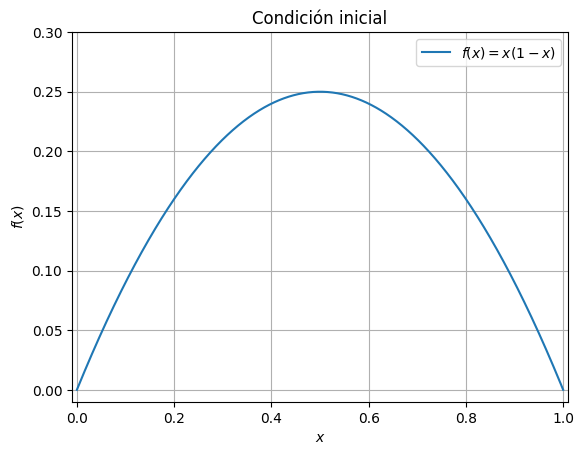

In [22]:
from pylab import *

# Condición inicial f(x) = x(1 - x)
def f(x):
    return x * (1 - x)

# Aproximación de la condición inicial usando serie de Fourier
def u_0(x, N=50):
    f_n = zeros(len(x))
    for n in range(1, N + 1):
        bn = 4 / (n * pi)**3 * (1 - (-1)**n)  # Coeficientes calculados analíticamente
        f_n += bn * sin(n * pi * x)
    return f_n

# Espacio
x = linspace(0, 1, 1000)

# Graficar condición inicial
plot(x, f(x), label='$f(x)=x(1-x)$')
xlabel('$x$'); ylabel('$f(x)$')
title("Condición inicial")
xlim([-0.01, 1.01]); ylim([-0.01, 0.3])
grid(); legend()
show()

h

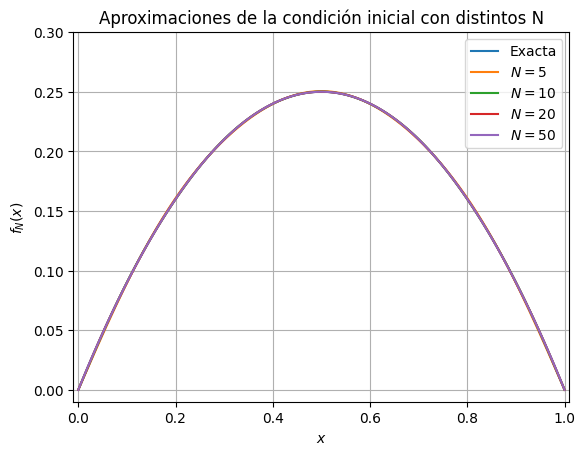

In [23]:


# Comparar aproximación de la condición inicial
plot(x, f(x), label='Exacta')
for N in [5, 10, 20, 50]:
    plot(x, u_0(x, N), label=f'$N={N}$')
xlabel('$x$'); ylabel('$f_N(x)$')
title("Aproximaciones de la condición inicial con distintos N")
xlim([-0.01, 1.01]); ylim([-0.01, 0.3])
grid(); legend()
show()

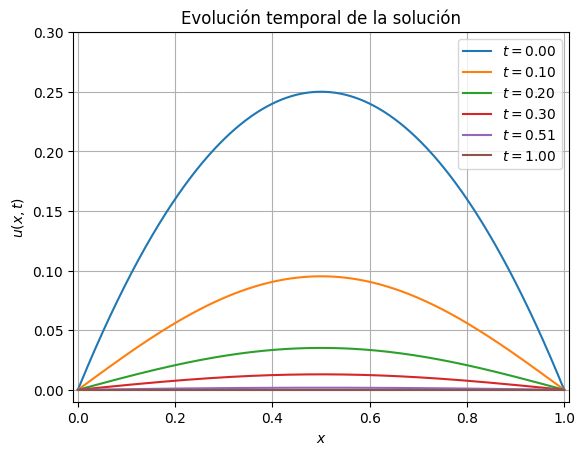

In [24]:


# Solución completa u(x,t) con parte temporal
def u_x_t(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N + 1):
            bn = 4 / (n * pi)**3 * (1 - (-1)**n)
            f[:, i] += bn * sin(n * pi * x) * exp(-(n * pi)**2 * t[i])
    return f

# Espacio y tiempo
x = linspace(0, 1, 1000)
t = linspace(0, 1, 100)

# Solución
U = u_x_t(x, t, N=50)

# Graficar evolución temporal en 2D
for i in [0, 10, 20, 30, 50, 99]:
    plot(x, U[:, i], label=f'$t={t[i]:.2f}$')
xlabel('$x$'); ylabel('$u(x,t)$')
title("Evolución temporal de la solución")
xlim([-0.01, 1.01]); ylim([-0.01, 0.3])
grid(); legend()
show()


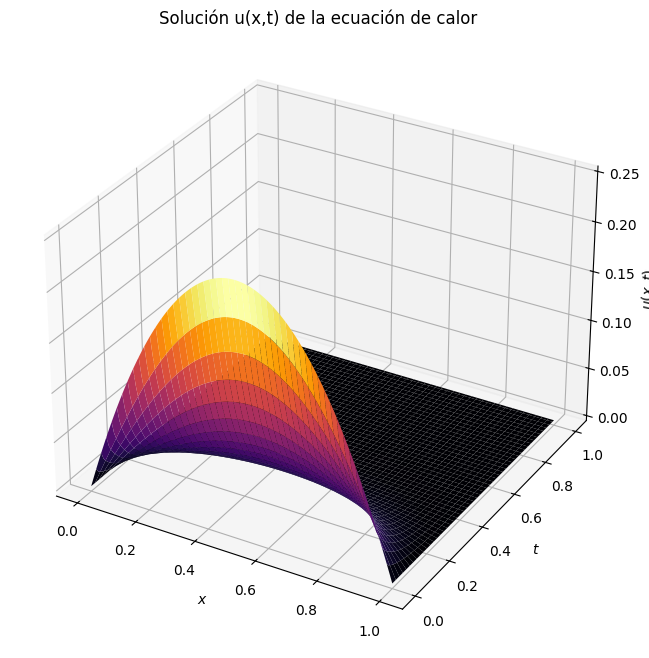

In [25]:

# Gráfica 3D
from mpl_toolkits.mplot3d import Axes3D

X, T = meshgrid(x, t)
fig = figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U.T, cmap='inferno')
xlabel('$x$'); ylabel('$t$'); ax.set_zlabel('$u(x,t)$')
title("Solución u(x,t) de la ecuación de calor")
show()